In [57]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import manifold
from sklearn import discriminant_analysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Task 1: Binary classification.

Explore the data to generate summary statistics and plots that help the reader understand
the data, with a focus on information relevant to the classification task.

Load the data, check for missing variables.

In [4]:
# Load Data
def load_data(file_path):
    return pd.read_csv(file_path, compression='gzip')


In [5]:
file_path = "Datasets/data1.csv.gz" 
label_column = "label" 

# Load the dataset
df = load_data(file_path)

In [6]:
df

,label,DPM1,NIPAL3,KRIT1,LAP3,CD99,MAD1L1,LASP1,M6PR,CFLAR,...,CISD3,DDX52,GGNBP2,C11orf98,MRPL45,TRG.AS1,EBLN3P,TRBV7.2,AC010642.2,POLR2J3.1
0,TREG,0.000000,0.0,0.000000,0.00000,4.459588,0.000000,4.175754,3.107406,3.107406,...,0.000000,0.000000,0.000000,3.777941,0.000000,0.000000,0.000000,0.000000,3.107406,0.000000
1,TREG,0.000000,0.0,0.000000,0.00000,3.159469,3.159469,0.000000,0.000000,3.159469,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.484917,0.000000,0.000000
2,CD4+T,3.568377,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.568377,0.000000,0.000000,0.000000,0.000000
3,CD4+T,2.574454,0.0,0.000000,0.00000,3.228759,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.574454,0.000000,0.000000,2.574454,0.000000,2.574454,0.000000,0.000000,2.574454
4,CD4+T,0.000000,0.0,0.000000,0.00000,0.000000,3.418392,0.000000,0.000000,0.000000,...,2.757484,0.000000,3.418392,0.000000,0.000000,2.757484,3.418392,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,2.786860,0.0,0.000000,2.78686,2.786860,2.786860,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.448715,0.000000,0.000000,0.000000
5467,TREG,0.000000,0.0,2.804178,0.00000,3.861582,0.000000,0.000000,0.000000,2.804178,...,0.000000,0.000000,3.466579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.804178
5468,TREG,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,2.953102,2.953102,...,0.000000,0.000000,0.000000,0.000000,2.953102,0.000000,0.000000,0.000000,0.000000,3.619814
5469,CD4+T,0.000000,0.0,0.000000,0.00000,4.067406,3.391236,3.391236,3.391236,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.391236,0.000000,0.000000,0.000000


In [7]:
# No missing values
sum(df.isna().sum())

0

Balanced problem? 

In [8]:
# Not fully balanced class.

df["label"].value_counts()

label
CD4+T    3356
TREG     2115
Name: count, dtype: int64

What type of regressors do we have, numerical, categorical/binary?
All numerical according.

In [9]:
df.dtypes

label          object
DPM1          float64
NIPAL3        float64
KRIT1         float64
LAP3          float64
               ...   
TRG.AS1       float64
EBLN3P        float64
TRBV7.2       float64
AC010642.2    float64
POLR2J3.1     float64
Length: 4124, dtype: object

Sparsity?

Difference in values of X for different lables.

### Visual analysis is tough given so many variables, let's use PCA.

In [10]:

# Separate x and y

regressors = df.columns.to_list()
regressors.remove("label")
regressors[0:5] #All regressors, label removed.

#Scaling is supposed to be important for PCA.

X = df[regressors]

scaler = preprocessing.StandardScaler()
scaler.fit(X)

X_standardized = scaler.transform(X)

#This is PCA
pca = decomposition.PCA(n_components=10)
pca_x_component = pca.fit_transform(X_standardized)

df_pca_x = pd.DataFrame(pca_x_component)

#Concatenate labels to columns 
df_pca_x = pd.concat([df['label'],df_pca_x],axis=1)

In [11]:
df_pca_x

,label,0,1,2,3,4,5,6,7,8,9
0,TREG,7.845086,-2.578691,-2.989150,14.288102,-7.667278,-14.885844,-2.293441,-3.622064,1.181864,-3.171910
1,TREG,0.166344,2.431817,-4.463784,15.803165,-3.173340,-7.059701,1.986909,6.310727,-2.371758,-0.753328
2,CD4+T,-15.443612,-10.449296,-5.617057,-2.349265,1.024707,2.216084,2.138484,-3.190802,3.997858,3.537404
3,CD4+T,0.987188,2.338324,8.525638,-8.412274,4.733804,1.111529,5.582536,1.245001,-0.007883,0.536915
4,CD4+T,0.749301,1.114879,6.038010,-5.695600,4.006000,-1.287089,0.982305,4.592455,1.245522,3.475047
...,...,...,...,...,...,...,...,...,...,...,...
5466,CD4+T,-1.241863,0.303626,9.758050,-3.136032,0.787711,1.017268,0.253153,3.974990,1.810752,-3.735136
5467,TREG,1.665901,-2.372652,6.225637,10.086477,7.344883,-6.331910,0.120702,-0.517664,4.468882,1.404676
5468,TREG,-2.878057,0.032986,4.010915,-1.562724,6.833410,-6.079882,-3.047059,2.859418,-2.300461,4.142442
5469,CD4+T,-4.037221,9.331288,4.513323,-3.508402,-10.667362,-0.351570,-4.006913,-3.967310,0.915581,0.706035


In [13]:
#sns.jointplot(data=df_pca_2, x=0, y=1, hue="label")


# Try the screeplot. Do a loop

In [20]:
pca = decomposition.PCA()
pca_x_component = pca.fit(X_standardized)
pca_x_component.explained_variance_ratio_

array([3.70794885e-02, 1.25490862e-02, 9.36711600e-03, ...,
       3.81536048e-06, 3.66958665e-06, 3.59648403e-06])

In [21]:
scree_data = pca_x_component.explained_variance_ratio_

In [71]:
# Cum sum to do scree plot
scree_data = scree_data.cumsum()

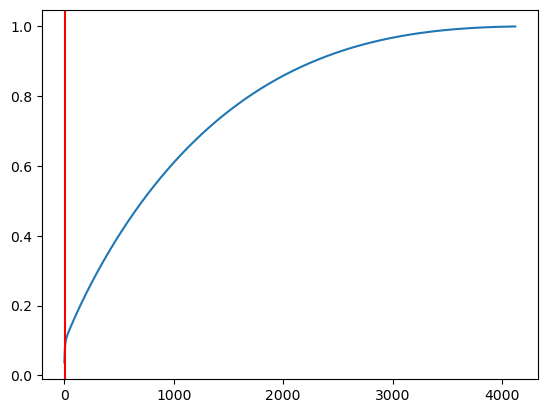

In [74]:
fig, ax = plt.subplots()      
ax = ax.plot(scree_data)
plt.axvline(x = 7, color = 'r', label = 'axvline - full height')


This has already been modified to be optimal

# Try other algorithms like t-SNE or UMAP

In [62]:
tic =time.time()

# TIME THE T-SNE TO SEE IF IT IS FEASIBLE. TAKES A 1000 YEARS SO UNFEASIBLE. MAYBE PCA TO 50 AND THEN THIS? OR UMAP TEST.
manifold.TSNE(n_components=10, learning_rate='auto',method="exact",
                  init='random', perplexity=3).fit_transform(X_standardized)

toc = time.time()
    
exec_time = (toc-tic)/60
print(exec_time)

KeyboardInterrupt: 

In [34]:

X_embedded = manifold.TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_standardized)
X_embedded

array([[-10.746103 ,  16.62907  ],
       [-10.261688 ,   5.697823 ],
       [ 17.24128  , -13.028131 ],
       ...,
       [ 16.126865 ,   4.7746525],
       [  5.720079 ,   4.485768 ],
       [ 14.132755 ,  -2.713441 ]], dtype=float32)

In [48]:
X_tsne = pd.DataFrame(X_embedded)

In [51]:
df_tsne_2 = pd.concat([df['label'],X_tsne],axis=1)

In [52]:
df_tsne_2

,label,0,1
0,TREG,-10.746103,16.629070
1,TREG,-10.261688,5.697823
2,CD4+T,17.241280,-13.028131
3,CD4+T,15.551535,7.320461
4,CD4+T,11.529454,6.398720
...,...,...,...
5466,CD4+T,19.010712,-1.039272
5467,TREG,6.917153,5.980327
5468,TREG,16.126865,4.774652
5469,CD4+T,5.720079,4.485768


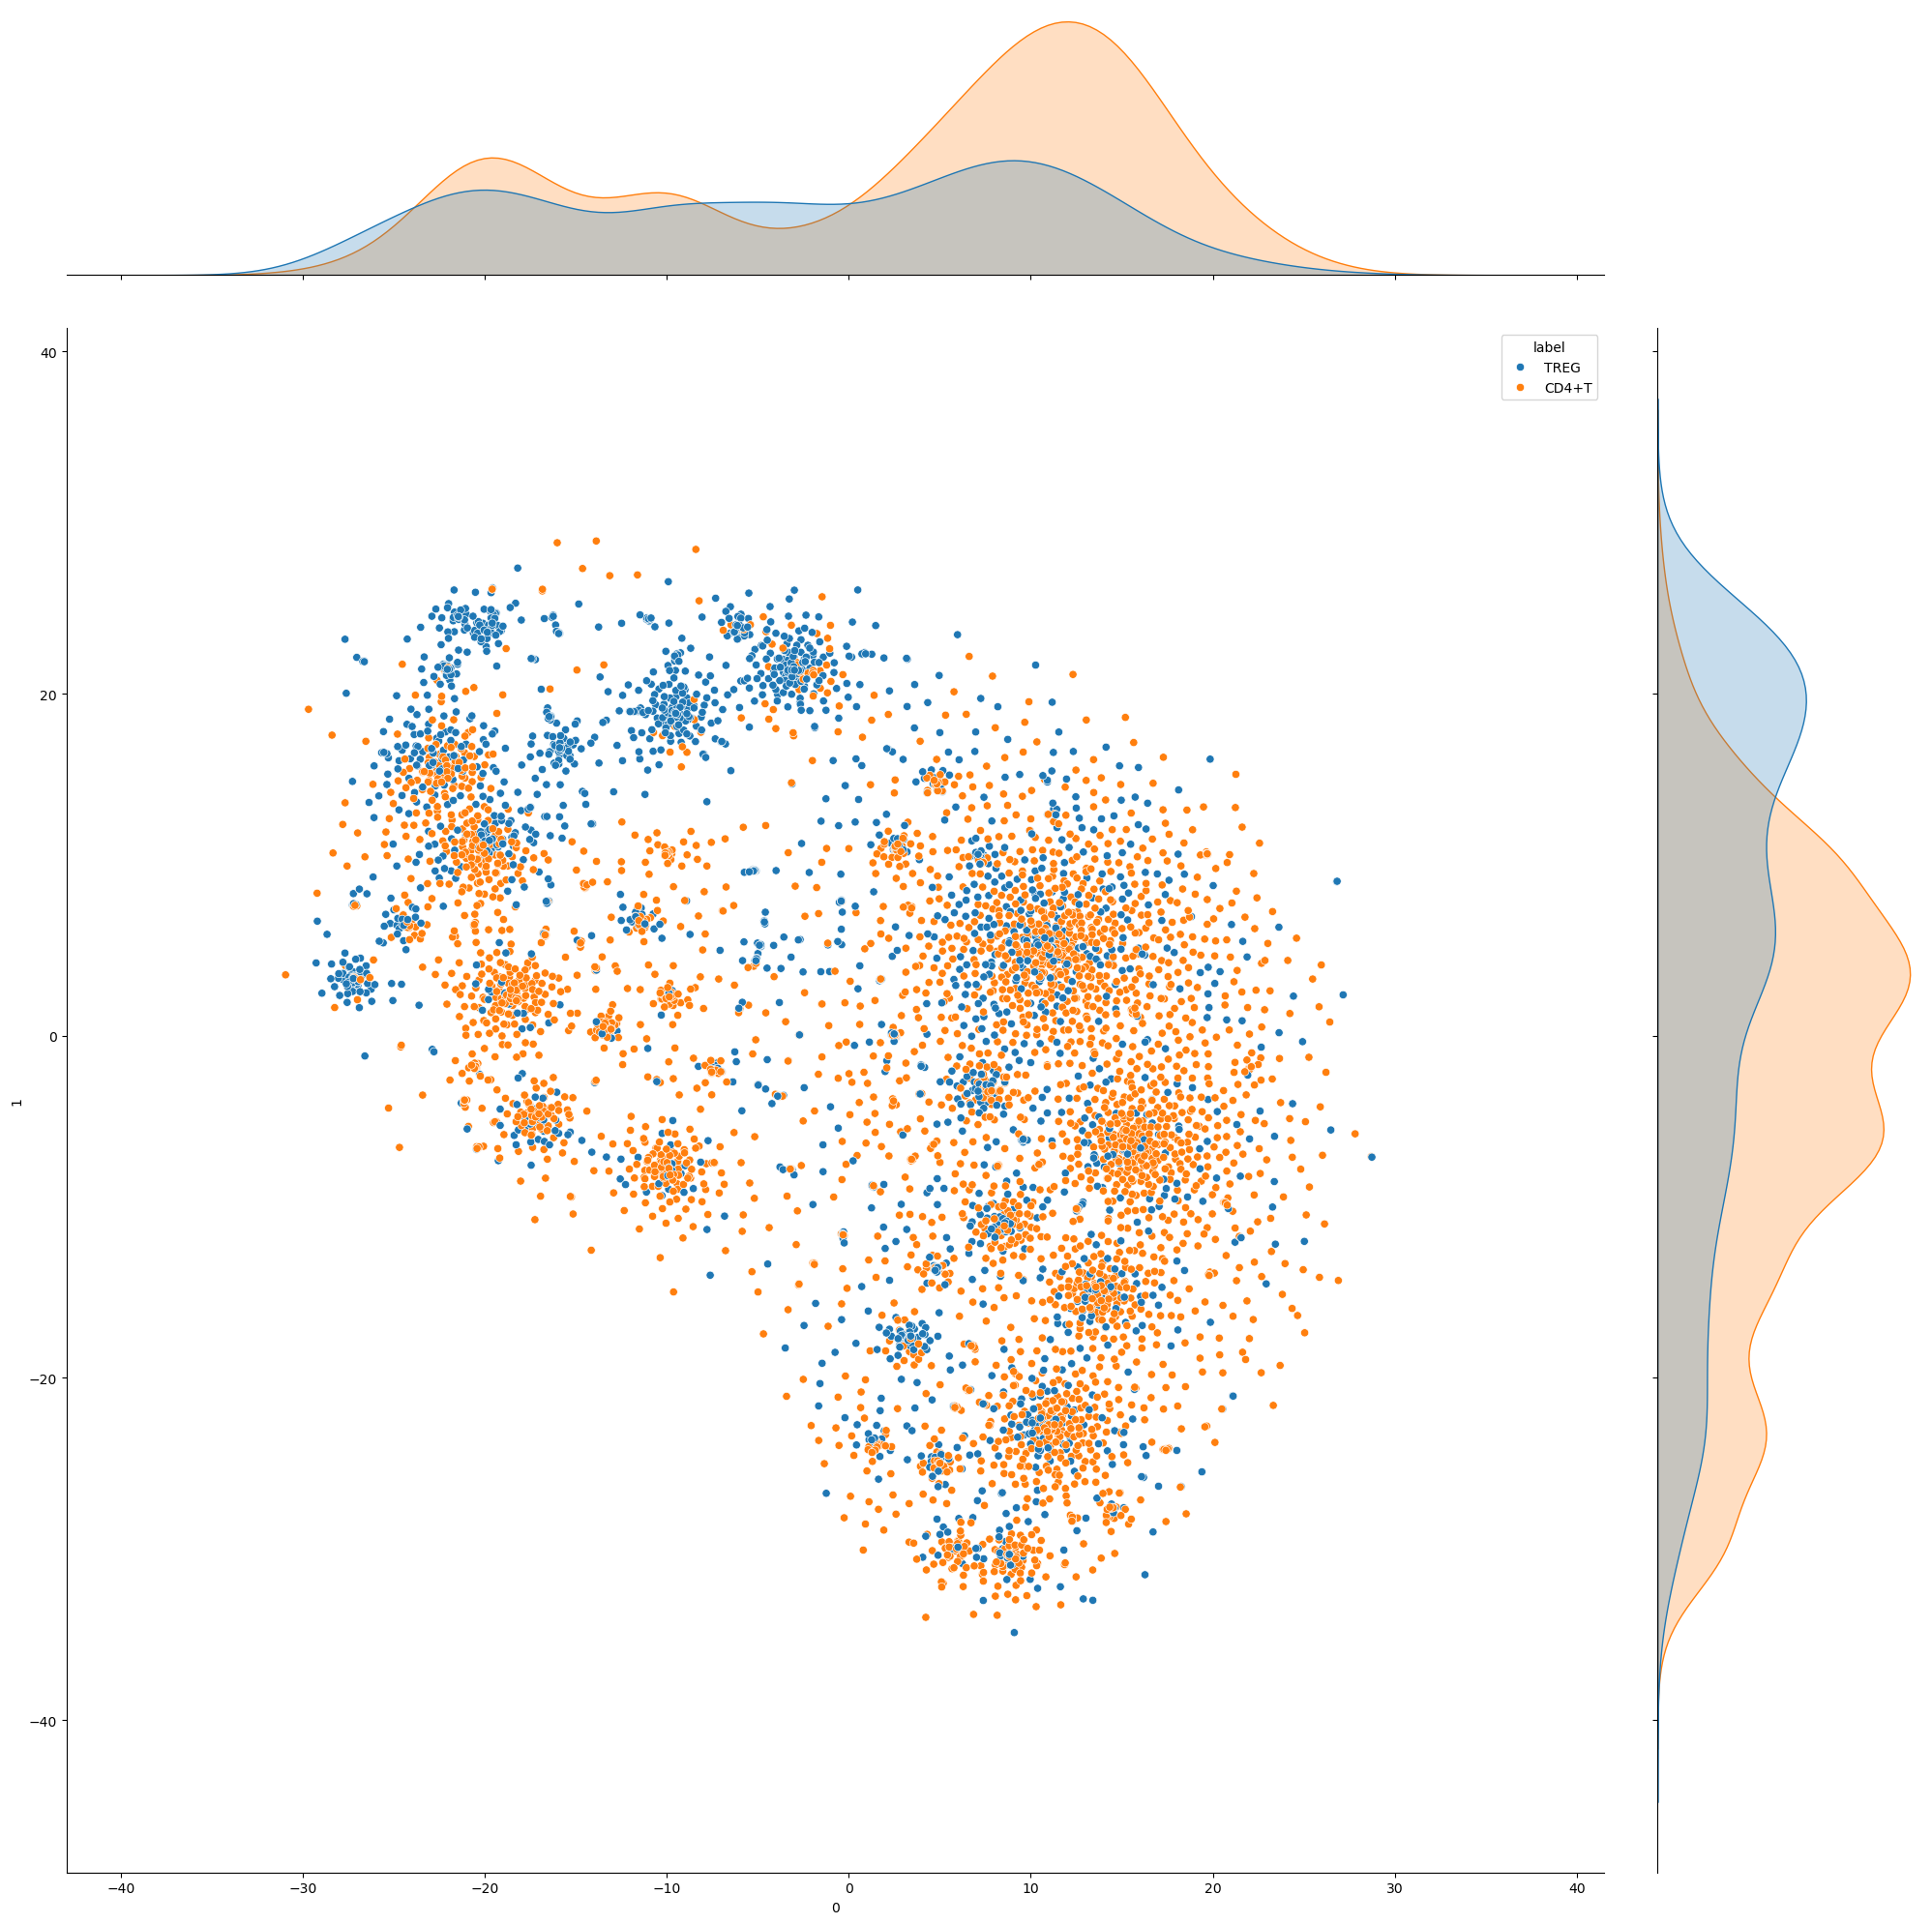

In [54]:
sns.jointplot(data=df_tsne_2, x=0, y=1, hue="label",height=20)
